# Exercício — Sono, hábitos, lifestyle, e indicadores de saúde
### Importação das bibliotecas e inicialização do dataframe

In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('sleep_health_lifestyle.csv')

### Limpando as colunas, atualizando o dataframe

In [469]:
df = df[['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
    'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']]

### Inserindo valores na coluna Sleep Disorder e corrigindo BMI Category

In [470]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df['BMI Category'] = df['BMI Category'].replace({'Normal Weight': 'Normal'})

### Transformando campos textuais em números

In [471]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

le2 = LabelEncoder()
df['BMI Category'] = le2.fit_transform(df['BMI Category'])

le3 = LabelEncoder()
df['Sleep Disorder'] = le3.fit_transform(df['Sleep Disorder'])

### Heatmap para analisar a relação entre as features

<Axes: >

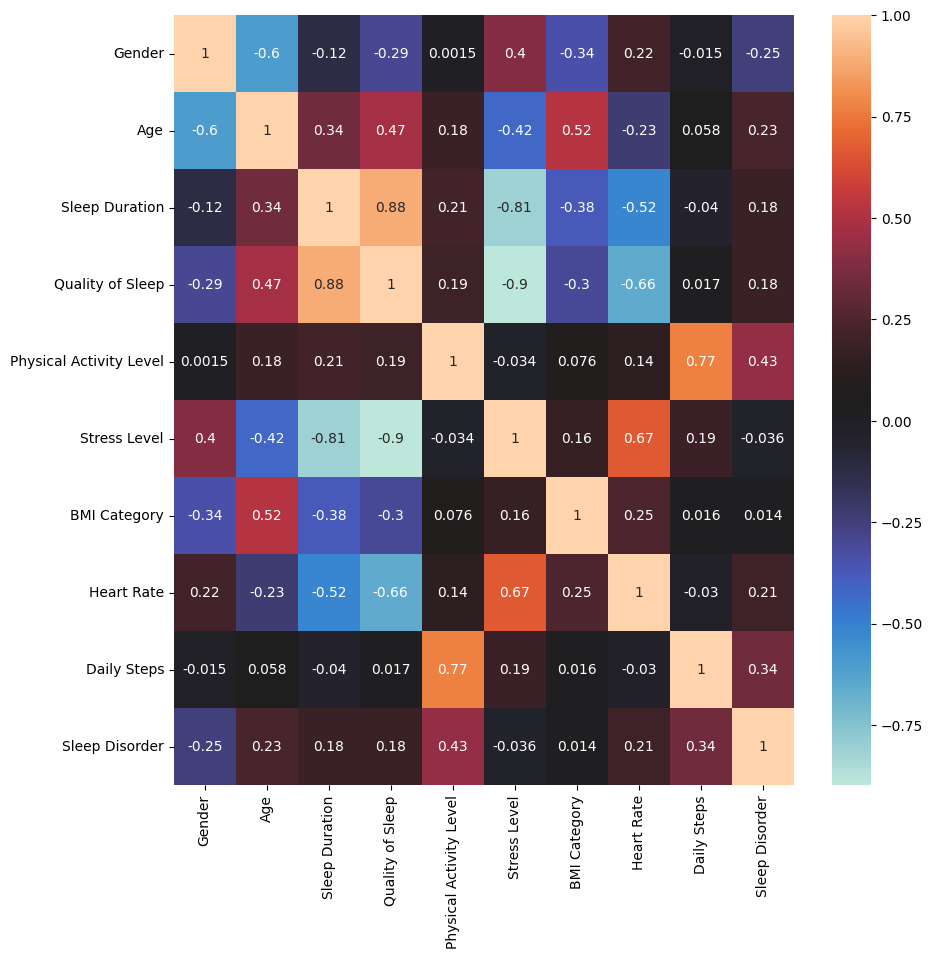

In [472]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='icefire')

### Scatter analisando a relação entre duração e qualidade do sono

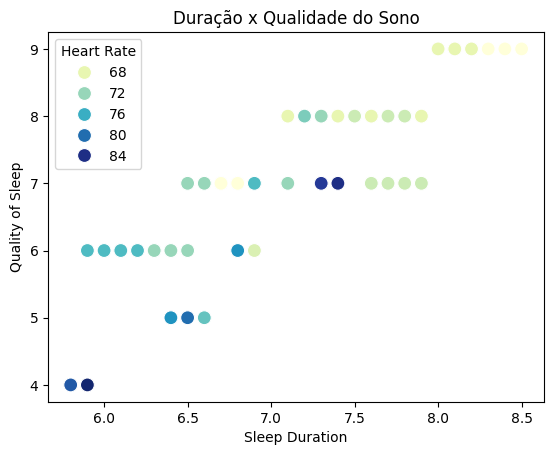

In [473]:
map_disorders = {0: "Insônia", 1: "Nenhum", 2: "Apneia do Sono"}

sns.scatterplot(data=df, x='Sleep Duration', y='Quality of Sleep', hue='Heart Rate', palette="YlGnBu", s=100)
plt.title('Duração x Qualidade do Sono')
plt.show()

### Scatter analisando a relação entre duração do sono e nível de estresse

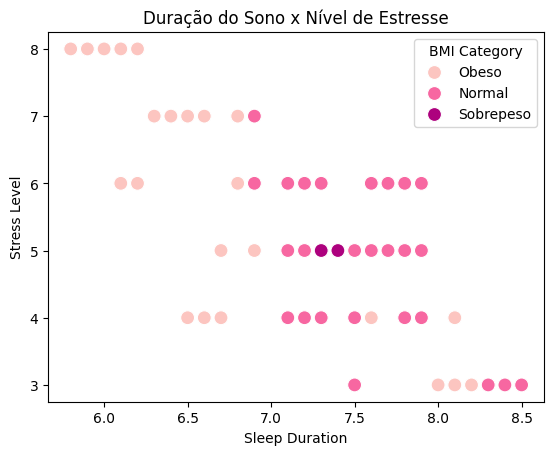

In [474]:
map_bmi = {0: "Normal", 1: "Sobrepeso", 2: "Obeso"}

sns.scatterplot(data=df, x='Sleep Duration', y='Stress Level', hue=df['BMI Category'].map(map_bmi), palette="RdPu", s=100)
plt.title('Duração do Sono x Nível de Estresse')
plt.show()

### Barplot analisando a relação da qualidade do sono e as doenças do sono, dividido por gênero

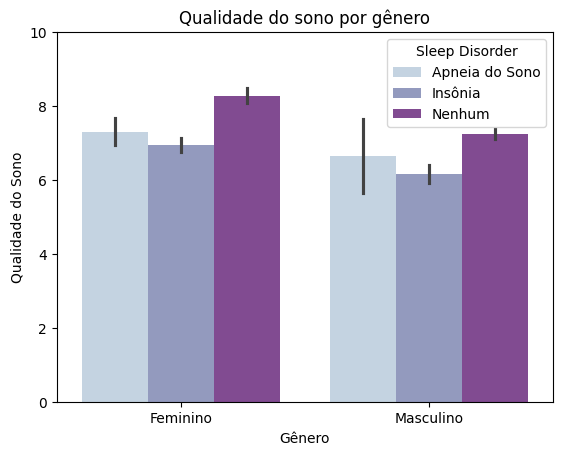

In [475]:
sns.barplot(data=df, x='Gender', y='Quality of Sleep', hue=df['Sleep Disorder'].map(map_disorders), palette="BuPu")

plt.title('Qualidade do sono por gênero')
plt.ylabel('Qualidade do Sono')
plt.xlabel('Gênero')
plt.xticks([0, 1], ['Feminino', 'Masculino'])
plt.ylim(0, 10)
plt.show()

### Histograma de distribuição da qualidade do sono

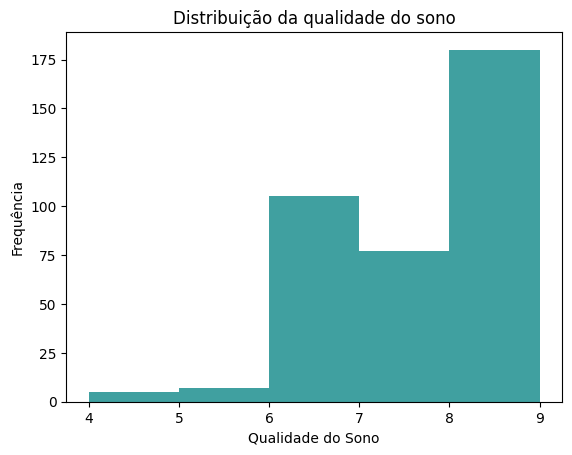

In [476]:
sns.histplot(df['Quality of Sleep'], color='teal', edgecolor="none", bins=[4,5,6,7,8,9])
plt.title("Distribuição da qualidade do sono")
plt.xlabel('Qualidade do Sono')
plt.ylabel('Frequência')
plt.show()

### Separando os dados para treinamento, para prever Stress Level

In [477]:
x_sleep = df.iloc[:, [0,1,2,3,6,7,8]].values
y_sleep = df.iloc[:, 5].values

### Separando dados entre teste e treinamento, sendo 30% para treinamento

In [478]:
from sklearn.model_selection import train_test_split
x_sleep_train, x_sleep_test, y_sleep_train, y_sleep_test = train_test_split(x_sleep, y_sleep, test_size=0.3, random_state=0)

x_sleep_train.shape, x_sleep_test.shape

((261, 7), (113, 7))

### Testando o modelo de ***Regressão Linear***

In [479]:
from sklearn.linear_model import LinearRegression
regression_sleep = LinearRegression()
regression_sleep.fit(x_sleep_train, y_sleep_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Medindo a qualidade do treinamento dos dados com o algoritmo

In [480]:
regression_sleep.score(x_sleep_train, y_sleep_train)

0.9246050632746905

### E a qualidade dos dados de teste

In [481]:
regression_sleep.score(x_sleep_train, y_sleep_train)

0.9246050632746905

### Fazendo as previsões com os dados que separamos para teste, para comparar com os valores reais

In [482]:
predictions = regression_sleep.predict(x_sleep_test)
predictions = np.round(predictions)
predictions

array([4., 8., 6., 5., 4., 4., 7., 5., 7., 7., 3., 5., 7., 8., 3., 5., 7.,
       5., 4., 3., 5., 6., 7., 7., 3., 7., 7., 5., 7., 8., 4., 4., 7., 7.,
       4., 7., 5., 5., 7., 5., 7., 8., 6., 3., 6., 8., 3., 3., 9., 6., 5.,
       5., 5., 5., 6., 8., 5., 6., 4., 5., 5., 5., 7., 7., 5., 7., 7., 8.,
       7., 7., 5., 6., 5., 3., 3., 7., 8., 8., 5., 7., 5., 5., 9., 3., 6.,
       7., 6., 3., 5., 6., 3., 3., 8., 5., 3., 3., 4., 6., 5., 4., 5., 4.,
       5., 4., 4., 7., 4., 8., 3., 7., 3., 8., 3.])

In [483]:
y_sleep_test

array([4, 8, 7, 5, 4, 4, 7, 5, 8, 8, 3, 5, 8, 8, 3, 5, 8, 6, 3, 3, 5, 6,
       7, 7, 3, 8, 7, 4, 7, 8, 3, 4, 8, 7, 4, 5, 6, 5, 8, 6, 8, 8, 7, 3,
       6, 8, 3, 3, 8, 6, 4, 6, 4, 5, 6, 8, 5, 6, 4, 5, 4, 6, 7, 7, 4, 8,
       8, 8, 7, 7, 5, 6, 6, 3, 3, 7, 8, 8, 5, 8, 5, 5, 8, 3, 6, 7, 6, 3,
       5, 6, 3, 3, 8, 4, 3, 3, 4, 6, 5, 4, 6, 4, 5, 6, 4, 8, 4, 8, 3, 6,
       3, 8, 3])

### Métricas de Erro: Mean Absolute Error e Mean Squared Error

In [484]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_sleep_test, predictions)
mse = mean_squared_error(y_sleep_test, predictions)
print(f"MAE: {mae} | MSE: {mse}")

MAE: 0.3185840707964602 | MSE: 0.35398230088495575


### Testando o modelo de ***Decision Tree***

In [485]:
from sklearn.tree import DecisionTreeRegressor
regression_decision_sleep = DecisionTreeRegressor()
regression_decision_sleep.fit(x_sleep_train, y_sleep_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


### Medindo a qualidade do treinamento dos dados com o algoritmo

In [486]:
regression_decision_sleep.score(x_sleep_train, y_sleep_train)

1.0

### E a qualidade dos dados de teste

In [487]:
regression_decision_sleep.score(x_sleep_test, y_sleep_test)

0.9698695884035488

### Fazendo as previsões com os dados que separamos para teste, para comparar com os valores reais

In [488]:
predictions = regression_decision_sleep.predict(x_sleep_test)
predictions = np.round(predictions)
predictions

array([4., 8., 7., 5., 4., 4., 7., 5., 8., 8., 3., 5., 8., 8., 3., 5., 8.,
       7., 3., 3., 5., 6., 7., 7., 3., 8., 7., 4., 7., 8., 3., 4., 8., 7.,
       4., 5., 6., 5., 8., 6., 8., 8., 7., 3., 6., 8., 3., 3., 8., 6., 4.,
       6., 4., 5., 6., 8., 5., 6., 4., 5., 4., 6., 7., 7., 4., 8., 8., 8.,
       7., 7., 5., 6., 6., 3., 3., 7., 8., 8., 5., 8., 5., 7., 8., 3., 6.,
       7., 6., 3., 5., 6., 3., 3., 8., 4., 3., 3., 4., 6., 5., 4., 7., 4.,
       5., 4., 4., 8., 4., 8., 3., 7., 3., 8., 3.])

In [489]:
y_sleep_test

array([4, 8, 7, 5, 4, 4, 7, 5, 8, 8, 3, 5, 8, 8, 3, 5, 8, 6, 3, 3, 5, 6,
       7, 7, 3, 8, 7, 4, 7, 8, 3, 4, 8, 7, 4, 5, 6, 5, 8, 6, 8, 8, 7, 3,
       6, 8, 3, 3, 8, 6, 4, 6, 4, 5, 6, 8, 5, 6, 4, 5, 4, 6, 7, 7, 4, 8,
       8, 8, 7, 7, 5, 6, 6, 3, 3, 7, 8, 8, 5, 8, 5, 5, 8, 3, 6, 7, 6, 3,
       5, 6, 3, 3, 8, 4, 3, 3, 4, 6, 5, 4, 6, 4, 5, 6, 4, 8, 4, 8, 3, 6,
       3, 8, 3])

### Métricas de Erro: Mean Absolute Error e Mean Squared Error

In [490]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_sleep_test, predictions)
mse = mean_squared_error(y_sleep_test, predictions)
print(f"MAE: {mae} | MSE: {mse}")

MAE: 0.061946902654867256 | MSE: 0.09734513274336283


### Testando o modelo de ***Random Forest Regressor***

In [491]:
from sklearn.ensemble import RandomForestRegressor
regressor_random_forest_sleep = RandomForestRegressor(n_estimators=100)
regressor_random_forest_sleep.fit(x_sleep_train, y_sleep_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Medindo a qualidade do treinamento dos dados com o algoritmo

In [492]:
regressor_random_forest_sleep.score(x_sleep_train, y_sleep_train)

0.9964555340009938

### E a qualidade dos dados de teste

In [493]:
regressor_random_forest_sleep.score(x_sleep_test, y_sleep_test)

0.9708693702428856

### Fazendo as previsões com os dados que separamos para teste, para comparar com os valores reais

In [494]:
predictions = regressor_random_forest_sleep.predict(x_sleep_test)
predictions = np.round(predictions)
predictions

array([4., 8., 7., 5., 4., 4., 7., 5., 8., 8., 3., 5., 8., 8., 3., 5., 8.,
       6., 3., 3., 5., 6., 7., 7., 3., 8., 7., 4., 7., 8., 4., 4., 8., 7.,
       4., 5., 6., 5., 8., 6., 8., 8., 7., 3., 6., 8., 3., 3., 8., 7., 4.,
       6., 4., 5., 6., 8., 5., 6., 4., 5., 4., 5., 7., 7., 4., 8., 8., 8.,
       7., 7., 5., 6., 6., 3., 3., 7., 8., 8., 5., 8., 5., 6., 8., 3., 7.,
       7., 6., 3., 5., 6., 3., 3., 8., 4., 3., 3., 4., 6., 5., 4., 6., 4.,
       5., 4., 4., 8., 4., 8., 3., 7., 3., 8., 3.])

In [495]:
y_sleep_test

array([4, 8, 7, 5, 4, 4, 7, 5, 8, 8, 3, 5, 8, 8, 3, 5, 8, 6, 3, 3, 5, 6,
       7, 7, 3, 8, 7, 4, 7, 8, 3, 4, 8, 7, 4, 5, 6, 5, 8, 6, 8, 8, 7, 3,
       6, 8, 3, 3, 8, 6, 4, 6, 4, 5, 6, 8, 5, 6, 4, 5, 4, 6, 7, 7, 4, 8,
       8, 8, 7, 7, 5, 6, 6, 3, 3, 7, 8, 8, 5, 8, 5, 5, 8, 3, 6, 7, 6, 3,
       5, 6, 3, 3, 8, 4, 3, 3, 4, 6, 5, 4, 6, 4, 5, 6, 4, 8, 4, 8, 3, 6,
       3, 8, 3])

### Métricas de Erro: Mean Absolute Error e Mean Squared Error

In [496]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_sleep_test, predictions)
mse = mean_squared_error(y_sleep_test, predictions)
print(f"MAE: {mae} | MSE: {mse}")

MAE: 0.07079646017699115 | MSE: 0.08849557522123894


### Testando o modelo de ***Elastic Net***

In [497]:
from sklearn.linear_model import ElasticNet

modelo_en = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=0)
modelo_en.fit(x_sleep_train, y_sleep_train)

y_pred_en = modelo_en.predict(x_sleep_train)

### Medindo a qualidade do treinamento dos dados com o algoritmo

In [498]:
modelo_en.score(x_sleep_train, y_sleep_train)

0.8935170035705716

### E a qualidade dos dados de teste

In [499]:
modelo_en.score(x_sleep_test, y_sleep_test)

0.8774727438258236

### Fazendo as previsões com os dados que separamos para teste, para comparar com os valores reais

In [500]:
predictions = modelo_en.predict(x_sleep_test)
predictions = np.round(predictions)
predictions

array([4., 8., 6., 5., 4., 4., 7., 6., 7., 7., 3., 5., 7., 8., 3., 5., 7.,
       6., 4., 3., 5., 6., 7., 7., 3., 7., 7., 5., 7., 8., 5., 4., 7., 7.,
       4., 6., 5., 5., 7., 6., 7., 8., 6., 3., 6., 7., 3., 3., 9., 7., 5.,
       6., 5., 5., 6., 8., 5., 6., 4., 5., 5., 5., 7., 7., 5., 7., 7., 8.,
       7., 7., 5., 6., 6., 3., 3., 7., 8., 8., 5., 7., 5., 6., 9., 3., 7.,
       7., 6., 3., 5., 6., 3., 3., 8., 5., 3., 3., 4., 6., 5., 4., 6., 4.,
       5., 5., 4., 7., 4., 8., 3., 6., 3., 7., 3.])

In [501]:
y_sleep_test

array([4, 8, 7, 5, 4, 4, 7, 5, 8, 8, 3, 5, 8, 8, 3, 5, 8, 6, 3, 3, 5, 6,
       7, 7, 3, 8, 7, 4, 7, 8, 3, 4, 8, 7, 4, 5, 6, 5, 8, 6, 8, 8, 7, 3,
       6, 8, 3, 3, 8, 6, 4, 6, 4, 5, 6, 8, 5, 6, 4, 5, 4, 6, 7, 7, 4, 8,
       8, 8, 7, 7, 5, 6, 6, 3, 3, 7, 8, 8, 5, 8, 5, 5, 8, 3, 6, 7, 6, 3,
       5, 6, 3, 3, 8, 4, 3, 3, 4, 6, 5, 4, 6, 4, 5, 6, 4, 8, 4, 8, 3, 6,
       3, 8, 3])

### Métricas de Erro: Mean Absolute Error e Mean Squared Error

In [502]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_sleep_test, predictions)
mse = mean_squared_error(y_sleep_test, predictions)
print(f"MAE: {mae} | MSE: {mse}")

MAE: 0.30973451327433627 | MSE: 0.3274336283185841
